### Домашняя работа


In [1]:
import pandas as pd
import numpy as np

#### 1. Преобразуйте данные:
- проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
- закодируйте категориальные переменные числовыми значениями по необходимости.

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [4]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [5]:
# data['height'].unique()
data = data.dropna() # удаляем строки с нулевыми значениями

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [8]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'height', 'weight', 'sport', 'sex' ] ]

# столбец sport является категориальной переменной
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies( selectedColumns, columns = [ 'sport' ] )

# столбец sex является целевой переменной, удаляем его из X
del X['sex']
X.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# целевая переменная (столбец sex) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [10]:
le.fit( data['sex'] )

LabelEncoder()

In [11]:
# записываем в переменную y преобразованный столбец sex

y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

2.Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [12]:
model = LogisticRegression()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [14]:
model.fit(X_train, y_train)

C:\Users\snikulin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

3.Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [15]:
from sklearn.metrics import roc_curve

In [16]:
predictions = model.predict_proba(X_test)

In [41]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])
# fpr, tpr, thres


In [54]:
for line in zip( fpr, tpr, thres ):
    print(line)

(0.0, 0.0, 1.999999489231102)
(0.0, 0.0008561643835616438, 0.9999994892311019)
(0.0, 0.004280821917808219, 0.999994662746854)
(0.00099601593625498, 0.004280821917808219, 0.9999931993083124)
(0.00099601593625498, 0.007705479452054794, 0.9999789536708371)
(0.00199203187250996, 0.007705479452054794, 0.9999677150078534)
(0.00199203187250996, 0.01797945205479452, 0.9999118159652245)
(0.00298804780876494, 0.01797945205479452, 0.9999104900311051)
(0.00298804780876494, 0.030821917808219176, 0.9996441053134039)
(0.00398406374501992, 0.030821917808219176, 0.9996021861623895)
(0.00398406374501992, 0.0351027397260274, 0.9992380005903587)
(0.0049800796812749, 0.0351027397260274, 0.9991163452914961)
(0.0049800796812749, 0.039383561643835614, 0.9985047259268351)
(0.0069721115537848604, 0.039383561643835614, 0.9982217758041257)
(0.0069721115537848604, 0.0410958904109589, 0.9980578045749211)
(0.008964143426294821, 0.0410958904109589, 0.9975585050308993)
(0.008964143426294821, 0.052226027397260275, 0.99

In [19]:
from matplotlib import pyplot as plt

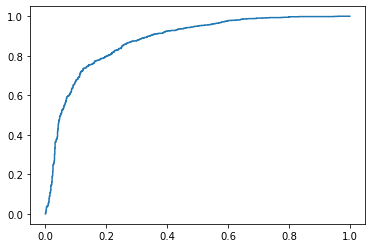

In [20]:
plt.plot( fpr, tpr )

4.Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
roc_auc_score(y_test, predictions[:, 1]) # высокая точность модели

0.8783619801615457

In [23]:
from sklearn.metrics import auc

In [24]:
auc( fpr, tpr )

0.8783619801615457

In [25]:
pred = model.predict(X_test)
pred[:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

5.Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [26]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative
tpr_ = []
fpr_ = []
prs_ = []
rcl_ = []
np = np.arange(1.0, 0.0, -0.1)


for i in np:
    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
#         print(predicted_prob)
    
        if predicted_prob > i:
#             print(predicted_prob)
            predicted = 1
        else:
            predicted = 0
#         print(predicted)
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
#     print(tp, fp)
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    try:
        tpr1 = tp / (tp + fn)
        fpr1 = fp / (fp + tn)
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)
    except ZeroDivisionError:
        continue
    tpr_.append(tpr1)
    fpr_.append(fpr1)
    prs_.append(precision)
    rcl_.append(recall)
# print(tp, fp, fn, tn)
tpr_, fpr_, np, prs_, rcl_

([0.16652397260273974,
  0.2862442922374429,
  0.3767123287671233,
  0.44931506849315067,
  0.5085616438356164,
  0.5610322896281801,
  0.6065924657534246,
  0.6462138508371386,
  0.6809075342465754],
 [0.01593625498007968,
  0.028552456839309428,
  0.04407370517928287,
  0.061752988047808766,
  0.08665338645418327,
  0.11667615253272624,
  0.15251494023904383,
  0.19776449756529438,
  0.2547808764940239],
 array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]),
 [0.9239904988123515,
  0.921028466483012,
  0.9086215797625193,
  0.8943421949556919,
  0.8722466960352423,
  0.8483447383022008,
  0.822283475990135,
  0.7917249417249417,
  0.7566359052421273],
 [0.16652397260273974,
  0.2862442922374429,
  0.3767123287671233,
  0.44931506849315067,
  0.5085616438356164,
  0.5610322896281801,
  0.6065924657534246,
  0.6462138508371386,
  0.6809075342465754])

In [27]:
for line in zip( fpr_, tpr_, prs_, rcl_):
    print( line )

(0.01593625498007968, 0.16652397260273974, 0.9239904988123515, 0.16652397260273974)
(0.028552456839309428, 0.2862442922374429, 0.921028466483012, 0.2862442922374429)
(0.04407370517928287, 0.3767123287671233, 0.9086215797625193, 0.3767123287671233)
(0.061752988047808766, 0.44931506849315067, 0.8943421949556919, 0.44931506849315067)
(0.08665338645418327, 0.5085616438356164, 0.8722466960352423, 0.5085616438356164)
(0.11667615253272624, 0.5610322896281801, 0.8483447383022008, 0.5610322896281801)
(0.15251494023904383, 0.6065924657534246, 0.822283475990135, 0.6065924657534246)
(0.19776449756529438, 0.6462138508371386, 0.7917249417249417, 0.6462138508371386)
(0.2547808764940239, 0.6809075342465754, 0.7566359052421273, 0.6809075342465754)


In [28]:
tpr3 = tp / (tp + fn)
tpr3

0.6809075342465754

In [29]:
fpr3 = fp / (fp + tn)
fpr3

0.2547808764940239

In [30]:
precision = tp/(tp + fp)
recall = tp/(tp + fn) # точность модели выше среднего , но могло быть и лучше
precision, recall

(0.7566359052421273, 0.6809075342465754)

6.Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

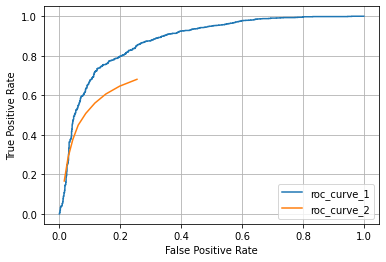

In [31]:
plt.plot( fpr, tpr, label = 'roc_curve_1' )
plt.plot( fpr_, tpr_, label = 'roc_curve_2' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.grid()

plt.legend( loc = 0 )
plt.show()

7.Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

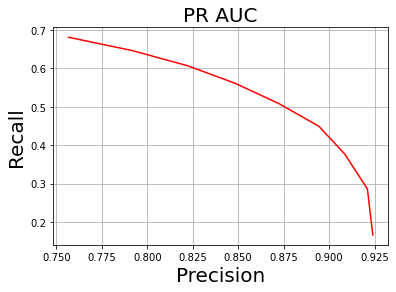

In [32]:
# plt.figure(figsize=(12, 12))
plt.plot(prs_, rcl_, color='red')
plt.title('PR AUC', fontdict={'fontsize': 20})
plt.xlabel('Precision', fontdict={'fontsize': 20})
plt.ylabel('Recall', fontdict={'fontsize': 20})
plt.grid()
plt.show()

8.*Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [33]:
auc( fpr_, tpr_ )

0.1303861125810955